## 2. Sampling
    - Abalone(전복) 데이터를 가져와 두 가지 Sampling 실행
        2.1.1 Over Sampling  : 적은 클래스의 수를 증가
        2.1.2 Under Sampling : 많은 클래스의 수를 감소
        2.2. SMOTE: Oversampling, UnderSampling의 단점을 극복하기 위한 sampling 방법 
    - imblearn의 내장함수 RandomOverSampler, RandomUnderSampler의 fit_resample(data, label) 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os 
from os.path import join

### Abalone Data 준비 과정

In [2]:
# join('파일위치', '파일이름')
## '.' : 현재 파일위치
abalone_path = join('.', 'abalone.txt') # 데이터
column_path  = join('.', 'abalone_attributes.txt') # 속성

In [3]:
# 파일내용 읽어오기
abalone_columns = list()

# column_path의 파일을 line by line으로 읽어옴
# strip() : 불필요한 내용 제거 ('\n' 와 같은 부분 제거)
for line in open(column_path):
    abalone_columns.append(line.strip())
    
abalone_columns

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [4]:
# header: 없을때는 None
# names : column이름 설정
data = pd.read_csv(abalone_path, header = None, names= abalone_columns)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# 'Sex' 속성을 따로 label에 저장하고 dataframe에서 삭제함
label = data['Sex']
del data['Sex']

In [6]:
# describe(): 요악정보 출력 (평균, 최대, 최소 등등)
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
# info(): column에 관한 정보 출력 (null상태, datatype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


### 2.1. Oversampling, Unersampling

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [9]:
# fit_resample(target, label) : data와 label를 입력하고 2개를 반환 받음
# oversampling
overSampled_data, overSampled_label = ros.fit_resample(data, label)
overSampled_data  = pd.DataFrame(overSampled_data, columns= data.columns)

# undersampling
underSampled_data, underSampled_label = rus.fit_resample(data, label)
underSampled_data = pd.DataFrame(underSampled_data, columns= data.columns)

In [10]:
# get_dummies(data): data의 가짓 수를 표현
print('-'*50)
print('원본 데이터의 클래스 비율:\n{}'.format(pd.get_dummies(label).sum()) )
print('-'*50)
print('oversampled 데이터의 클래스 비율:\n{}'.format(pd.get_dummies(overSampled_label).sum()) )
print('-'*50)
print('undersampled 데이터의 클래스 비율:\n{}'.format(pd.get_dummies(underSampled_label).sum()) )

--------------------------------------------------
원본 데이터의 클래스 비율:
F    1307
I    1342
M    1528
dtype: int64
--------------------------------------------------
oversampled 데이터의 클래스 비율:
F    1528
I    1528
M    1528
dtype: int64
--------------------------------------------------
undersampled 데이터의 클래스 비율:
F    1307
I    1307
M    1307
dtype: int64


### 2.2. SMOTE
    - Oversampling 과 Undersampling의 단점을 극복한 sampling 방법
    - 데이터 손실 없이 과적합 문제를 해결할 수 있음

#### 임의의 Sample을 만들어 SMOTE 테스트하기

In [11]:
# Classification(분류)에 필요한 library
from sklearn.datasets import make_classification

# 임의의 sample 만들기
data, label = make_classification(
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    n_classes = 3,
    n_samples  = 1000,
    weights    = [0.05, 0.15, 0.8],
    random_state = 2022,
    n_repeated = 0,
    n_clusters_per_class= 1,
    class_sep = 0.8,
)

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [13]:
smoted_data, smoted_label = smote.fit_resample(data, label)

print('-'*50)
print('원본 데이터의 클래스 비율:\n{}'.format(pd.get_dummies(label).sum()) )
print('-'*50)
print('SMOTE 데이터의 클래스 비율:\n{}'.format(pd.get_dummies(smoted_label).sum()) )

--------------------------------------------------
원본 데이터의 클래스 비율:
0     54
1    152
2    794
dtype: int64
--------------------------------------------------
SMOTE 데이터의 클래스 비율:
0    794
1    794
2    794
dtype: int64


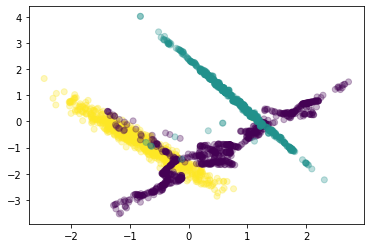

In [14]:
fig = plt.Figure(figsize=(12,6))
plt.scatter( smoted_data[:,0], smoted_data[:,1], 
            c= smoted_label, alpha = 0.3)

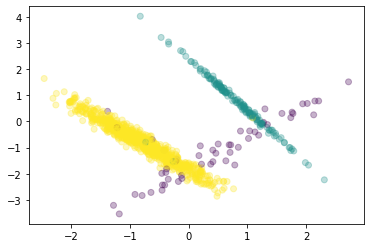

In [15]:
fig = plt.Figure(figsize=(12,6))
plt.scatter( data[:,0], data[:,1], 
            c= label, alpha = 0.3)